- ticket_data.csv: Containing a ticket history (one line => a ticket proposal on
tictactrip)
- cities.csv the cities served by tictactrip (link thanks to the columns o_city (origin_city), d_city
(destination_city) from ticket_data)
- stations.csv stations served by tictactrip (link via o_station, d_station from ticket_data)
- providers.csv info on the different providers (link via company from ticket_data)
A provider is a "sub-company". For example TGV and TER are two providers of VSC
(SNCF trips)

In [40]:
import pandas as pd

In [41]:
tickets = pd.read_csv("Data/ticket_data.csv")
cities = pd.read_csv("Data/cities.csv")
stations = pd.read_csv("Data/stations.csv")
providers = pd.read_csv("Data/providers.csv")

In [42]:
print(tickets.shape)
tickets.head(5)

(74168, 12)


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [43]:
print(cities.shape)
cities.head(5)

(8040, 6)


,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [44]:
print(stations.shape)
stations.head(5)

(11035, 4)


,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [45]:
print(providers.shape)
providers.head(5)

(227, 10)


,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


# Goal 

* extract interesting information such as min, average and max price, min / max / average duration
per trip
* average price difference and duration depending on the train, bus and carpool depending on the distance from
route (0-200km, 201-800km, 800-2000km, 2000 + km)
* the most bonus info

count    74168.000000
mean      4382.711061
std       3739.325367
min        300.000000
25%       1900.000000
50%       3350.000000
75%       5250.000000
max      38550.000000
Name: price_in_cents, dtype: float64


<AxesSubplot:>

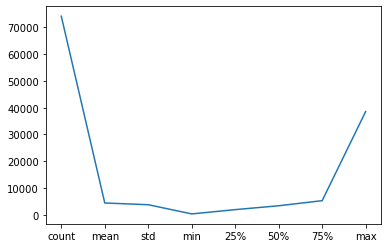

In [67]:
price = tickets["price_in_cents"].describe()
print(price)
price.plot()

In [64]:
cities_col = cities[["id", "unique_name"]]
new_df = pd.merge(left=tickets, right=cities_col, how='left', left_on="o_city", right_on="id")
new_df = new_df.rename(columns={"unique_name": "city_origin"})
new_df = new_df.drop("id_y", axis=1)

new_df = pd.merge(left=new_df, right=cities_col, how='left', left_on="d_city", right_on="id")
new_df = new_df.rename(columns={"unique_name": "city_destiny"})
new_df = new_df.drop("id", axis=1)

stations_col = stations[["id", "unique_name"]]
new_df = pd.merge(left=new_df, right=stations_col, how='left', left_on="o_station", right_on="id")
new_df = new_df.rename(columns={"unique_name": "station_origin"})
new_df = new_df.drop("id", axis=1)
new_df

new_df = pd.merge(left=new_df, right=stations_col, how='left', left_on="d_station", right_on="id")
new_df = new_df.rename(columns={"unique_name": "station_destiny"})
new_df = new_df.drop("id", axis=1)

providers_col = providers[["id", "name", "transport_type"]]
new_df = pd.merge(left=new_df, right=providers_col, how='left', left_on="company", right_on="id")
new_df = new_df.rename(columns={"name": "transport_name", "transport_type": "type"})
new_df = new_df.drop("id", axis=1)

In [66]:
new_df.to_csv("Data/data.csv")